In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import sys
import seaborn as sns
%matplotlib inline
# converts labels into integers, and vice versa, needed by scikit-learn.
label_encoder = LabelEncoder()

# encodes feature dictionaries as numpy vectors, needed by scikit-learn.
vectorizer = DictVectorizer()

In [2]:
from Bio import SeqIO
from Bio.Alphabet.IUPAC import extended_protein
import collections
from Bio.SeqUtils import IsoelectricPoint
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [3]:
# ########################
import os

def processData(str_,seq, Labels):
    
    s = str_.split('\n>')

    for i in range(1, len(s)):

        d = s[i].split('\n')
        f= ''.join(d[1:])
        seq.append(f)
        
        if Labels!=None:
            Labels.append(infile)
            
        
        

seqTrain=[]
LabelsTrain= []

seqTest=[]

#calculating the list contating protein sequences of training data for feature extraction and other list of labels
path = 'data/'
listing = os.listdir(path)
for infile in listing:
    image_path = path + infile
    fileTrain= open(image_path, "r+", encoding= "ISO-8859-1")
    strTrain = fileTrain.read()
    processData(strTrain,seqTrain, LabelsTrain)


#calculating the list contating protein sequences of test data for feature extraction    
fileTest= open("TestData/blind.fasta.txt","r+") 
strTest = fileTest.read()
s = strTest.split('\n>')

    
for i in range(0, len(s)):
    d = s[i].split('\n')
    f= ''.join(d[1:])
    seqTest.append(f)
        

#processData(strTest,seqTest,None)              


#print(LabelsTrain)

In [4]:
#LabelsTrain

In [4]:
#library

def count_dict(mystring,fdict):
    for w in set(mystring): 
        fdict['amino counts: ' + w] = mystring.count(w)
        
        
        
def count_dict_from_Top50(mystring,fdict):
    substring= mystring[0:50]
    for w in set(substring): 
        fdict['amino counts from top 50: ' + w] = substring.count(w)
        

def count_dict_from_Last50(mystring,fdict):
    substring= mystring[-50:]
    for w in set(substring): 
        fdict['amino counts from Last 50: ' + w] = substring.count(w)        
        
        
def molecular_weight(mystring,fdict):
    
    weight = 0
    weights ={'A' : 89.0935, 'R' : 174.2017, 'N' : 132.1184, 'D' : 133.1032, 'C' : 121.1590,'E' : 147.1299,
      'Q' : 146.1451, 'G' : 75.0669,'H' : 155.1552, 'I' : 131.1736, 'L' : 131.1736, 'K' : 146.1882,'M' : 149.2124,
      'F' : 165.1900, 'P' : 115.1310, 'S' : 105.0930, 'T' : 119.1197, 'W' : 204.2262, 'Y' : 181.1894, 'V' : 117.1469,
      'X' : 0.00000, 'U' : 168.07, 'B' : 133.10} 
              #  for unknown amino acid

    for amino in mystring:
        weight = weight + weights[amino]
       
    
    fdict['Molecular Weight: '] = weight
    
    
def isoelctric_point(mystring,fdict): 
    analysed_seq = ProteinAnalysis(mystring)
    
    fdict['Isolelectric Point: '] = analysed_seq.isoelectric_point()
            
        
#########################

In [5]:
all_features_listTrain = []
all_features_listTest = []

def features(seq, all_features_list):
    
    for idx in range(len(seq)):
        seq_feature = {}
    
    # Sequence length feature
        seq_feature['seq_length_feature'] = len(seq[idx])
    
    # amino counts feature
        count_dict(seq[idx],seq_feature)
    
    # more feature...
    
        count_dict_from_Top50(seq[idx],seq_feature)
        
        count_dict_from_Last50(seq[idx],seq_feature)
        
        #molecular_weight(seq[idx],seq_feature)
        
        isoelctric_point(seq[idx],seq_feature)
        
        

    
        all_features_list.append(seq_feature)
        
features(seqTrain,all_features_listTrain)
features(seqTest,all_features_listTest)


In [6]:
def printResults(result, result_prob):
    confidence = np.max(result_prob, axis=1)
    
    print ('Class\t\t\tConfidence')
    for r,c in zip(result,confidence):
        
        print (r[:-10]+'\t\t\t{}'.format(c))
        
        

In [33]:
# all_features_listTrain

# Plots of Distribution of features

In [273]:
import pandas as pd
dd = pd.DataFrame.from_dict(all_features_listTrain)
dd = dd.fillna(0)
plotdata = dd.T[1:23]
plotdataTop = dd.T[23:45]
plotdataAmino= dd.T[45:68]
plotdata.shape

(22, 9215)

In [34]:
# dd.T[45:67]

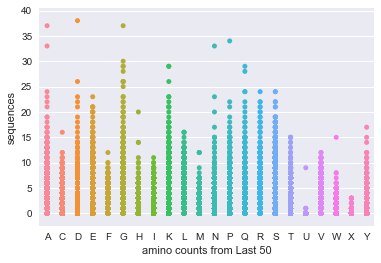

In [274]:
amino = ['A', 'C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y']
seq = np.array([plotdata.T['amino counts from Last 50: A'].values, 
                plotdata.T['amino counts from Last 50: C'].values,
                plotdata.T['amino counts from Last 50: D'].values, 
                plotdata.T['amino counts from Last 50: E'].values,
                plotdata.T['amino counts from Last 50: F'].values, 
                plotdata.T['amino counts from Last 50: G'].values,
                plotdata.T['amino counts from Last 50: H'].values, 
                plotdata.T['amino counts from Last 50: I'].values,
                plotdata.T['amino counts from Last 50: K'].values, 
                plotdata.T['amino counts from Last 50: L'].values,
                plotdata.T['amino counts from Last 50: M'].values, 
                plotdata.T['amino counts from Last 50: N'].values,
                plotdata.T['amino counts from Last 50: P'].values, 
                plotdata.T['amino counts from Last 50: Q'].values,
                plotdata.T['amino counts from Last 50: R'].values, 
                plotdata.T['amino counts from Last 50: S'].values,
                plotdata.T['amino counts from Last 50: T'].values, 
                plotdata.T['amino counts from Last 50: U'].values,
                plotdata.T['amino counts from Last 50: V'].values, 
                plotdata.T['amino counts from Last 50: W'].values,
                plotdata.T['amino counts from Last 50: X'].values, 
                plotdata.T['amino counts from Last 50: Y'].values]).flatten()
a = np.array([np.full(plotdata.shape[1],'A'),
              np.full(plotdata.shape[1],'C'),
              np.full(plotdata.shape[1],'D'),
              np.full(plotdata.shape[1],'E'),
              np.full(plotdata.shape[1],'F'),
              np.full(plotdata.shape[1],'G'),
              np.full(plotdata.shape[1],'H'),
              np.full(plotdata.shape[1],'I'),
              np.full(plotdata.shape[1],'K'),
              np.full(plotdata.shape[1],'L'),
              np.full(plotdata.shape[1],'M'),
              np.full(plotdata.shape[1],'N'),
              np.full(plotdata.shape[1],'P'),
              np.full(plotdata.shape[1],'Q'),
              np.full(plotdata.shape[1],'R'),
              np.full(plotdata.shape[1],'S'),
              np.full(plotdata.shape[1],'T'),
              np.full(plotdata.shape[1],'U'),
              np.full(plotdata.shape[1],'V'),
              np.full(plotdata.shape[1],'W'),
              np.full(plotdata.shape[1],'X'),
              np.full(plotdata.shape[1],'Y')]).flatten()
data = pd.DataFrame({'amino counts from Last 50':a, 'sequences':seq})
ax2 = sns.stripplot(x="amino counts from Last 50", y="sequences", data=data)
fig = ax2.get_figure()
fig.savefig('amino counts from Last 50.eps', format='eps', dpi=15) 

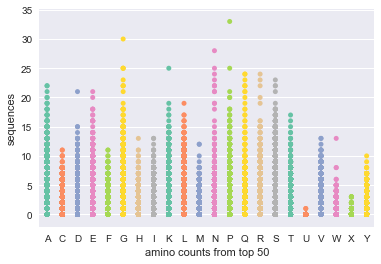

In [268]:
# amino = ['A', 'C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y']
# plotdata = plotdataTop

# seq2 = np.array([plotdata.T['amino counts from top 50: A'].values, 
#                 plotdata.T['amino counts from top 50: C'].values,
#                 plotdata.T['amino counts from top 50: D'].values, 
#                 plotdata.T['amino counts from top 50: E'].values,
#                 plotdata.T['amino counts from top 50: F'].values, 
#                 plotdata.T['amino counts from top 50: G'].values,
#                 plotdata.T['amino counts from top 50: H'].values, 
#                 plotdata.T['amino counts from top 50: I'].values,
#                 plotdata.T['amino counts from top 50: K'].values, 
#                 plotdata.T['amino counts from top 50: L'].values,
#                 plotdata.T['amino counts from top 50: M'].values, 
#                 plotdata.T['amino counts from top 50: N'].values,
#                 plotdata.T['amino counts from top 50: P'].values, 
#                 plotdata.T['amino counts from top 50: Q'].values,
#                 plotdata.T['amino counts from top 50: R'].values, 
#                 plotdata.T['amino counts from top 50: S'].values,
#                 plotdata.T['amino counts from top 50: T'].values, 
#                 plotdata.T['amino counts from top 50: U'].values,
#                 plotdata.T['amino counts from top 50: V'].values, 
#                 plotdata.T['amino counts from top 50: W'].values,
#                 plotdata.T['amino counts from top 50: X'].values, 
#                 plotdata.T['amino counts from top 50: Y'].values]).flatten()
# a2 = np.array([np.full(plotdata.shape[1],'A'),
#               np.full(plotdata.shape[1],'C'),
#               np.full(plotdata.shape[1],'D'),
#               np.full(plotdata.shape[1],'E'),
#               np.full(plotdata.shape[1],'F'),
#               np.full(plotdata.shape[1],'G'),
#               np.full(plotdata.shape[1],'H'),
#               np.full(plotdata.shape[1],'I'),
#               np.full(plotdata.shape[1],'K'),
#               np.full(plotdata.shape[1],'L'),
#               np.full(plotdata.shape[1],'M'),
#               np.full(plotdata.shape[1],'N'),
#               np.full(plotdata.shape[1],'P'),
#               np.full(plotdata.shape[1],'Q'),
#               np.full(plotdata.shape[1],'R'),
#               np.full(plotdata.shape[1],'S'),
#               np.full(plotdata.shape[1],'T'),
#               np.full(plotdata.shape[1],'U'),
#               np.full(plotdata.shape[1],'V'),
#               np.full(plotdata.shape[1],'W'),
#               np.full(plotdata.shape[1],'X'),
#               np.full(plotdata.shape[1],'Y')]).flatten()
# data = pd.DataFrame({'amino counts from top 50':a2, 'sequences':seq2})
# ax1 = sns.stripplot(x="amino counts from top 50", y="sequences", data=data, palette="Set2",)
# fig = ax1.get_figure()
# fig.savefig('amino counts from top 50.eps', format='eps', dpi=50) 

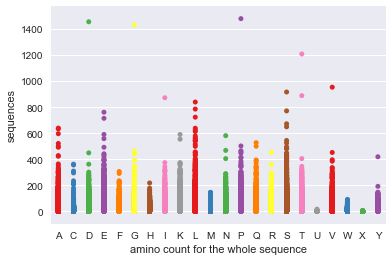

In [265]:
# amino = ['A', 'C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y']
# plotdata = plotdataAmino

# seq2 = np.array([plotdata.T['amino counts: A'].values, 
#                 plotdata.T['amino counts: C'].values,
#                 plotdata.T['amino counts: D'].values, 
#                 plotdata.T['amino counts: E'].values,
#                 plotdata.T['amino counts: F'].values, 
#                 plotdata.T['amino counts: G'].values,
#                 plotdata.T['amino counts: H'].values, 
#                 plotdata.T['amino counts: I'].values,
#                 plotdata.T['amino counts: K'].values, 
#                 plotdata.T['amino counts: L'].values,
#                 plotdata.T['amino counts: M'].values, 
#                 plotdata.T['amino counts: N'].values,
#                 plotdata.T['amino counts: P'].values, 
#                 plotdata.T['amino counts: Q'].values,
#                 plotdata.T['amino counts: R'].values, 
#                 plotdata.T['amino counts: S'].values,
#                 plotdata.T['amino counts: T'].values, 
#                 plotdata.T['amino counts: U'].values,
#                 plotdata.T['amino counts: V'].values, 
#                 plotdata.T['amino counts: W'].values,
#                 plotdata.T['amino counts: X'].values, 
#                 plotdata.T['amino counts: Y'].values]).flatten()
# a2 = np.array([np.full(plotdata.shape[1],'A'),
#               np.full(plotdata.shape[1],'C'),
#               np.full(plotdata.shape[1],'D'),
#               np.full(plotdata.shape[1],'E'),
#               np.full(plotdata.shape[1],'F'),
#               np.full(plotdata.shape[1],'G'),
#               np.full(plotdata.shape[1],'H'),
#               np.full(plotdata.shape[1],'I'),
#               np.full(plotdata.shape[1],'K'),
#               np.full(plotdata.shape[1],'L'),
#               np.full(plotdata.shape[1],'M'),
#               np.full(plotdata.shape[1],'N'),
#               np.full(plotdata.shape[1],'P'),
#               np.full(plotdata.shape[1],'Q'),
#               np.full(plotdata.shape[1],'R'),
#               np.full(plotdata.shape[1],'S'),
#               np.full(plotdata.shape[1],'T'),
#               np.full(plotdata.shape[1],'U'),
#               np.full(plotdata.shape[1],'V'),
#               np.full(plotdata.shape[1],'W'),
#               np.full(plotdata.shape[1],'X'),
#               np.full(plotdata.shape[1],'Y')]).flatten()
# data = pd.DataFrame({'amino count for the whole sequence':a2, 'sequences':seq2})
 
# ax = sns.stripplot(x="amino count for the whole sequence", y="sequences", data=data, palette="Set1",)
# fig = ax.get_figure()
# fig.savefig('amino count for the whole sequence.eps', format='eps', dpi=50) 

# MACHINE LEARNING MODELS

# 

# Logistic Regression


In [26]:
# Splitting the trainning datat into training and validation set.

X= all_features_listTrain
y= LabelsTrain
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.30, random_state=48)

In [29]:
train_event_x1 = vectorizer.fit_transform(X_train)
train_event_y1 = label_encoder.fit_transform(y_train)
lr1 = LogisticRegression(C=1, class_weight='balanced', penalty='l2')
lr1.fit(train_event_x1, train_event_y1)

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
train_event_x1.shape

(6450, 69)

In [30]:
event_x1_valid = vectorizer.transform(X_validation)
event_y1_valid = label_encoder.inverse_transform(lr1.predict(event_x1_valid))
event_prob1 = lr1.predict_proba(event_x1_valid)
#printResults(event_y1_valid,event_prob1)

In [26]:
accuracy_score(y_validation,event_y1_valid)

0.62314647377938515

In [31]:
# accuracyL= []



# C_values = [0.0001,0.0003, 0.0005, 0.001, 0.003,0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5,1, 1.2, 1.5]

# for i in C_values:
    
#     lr1 = LogisticRegression(C= i, class_weight='balanced', penalty='l2')
#     lr1.fit(train_event_x1, train_event_y1)


#     event_x1_valid = vectorizer.transform(X_validation)
#     event_y1_valid = label_encoder.inverse_transform(lr1.predict(event_x1_valid))
#     event_prob1 = lr1.predict_proba(event_x1_valid)
#     #printResults(event_y1_valid,event_prob1)

#     acc= accuracy_score(y_validation,event_y1_valid)
#     accuracyL.append(acc)

In [15]:
# accuracyL

In [16]:
# optimalC = C_values[np.argmax(accuracyL)]

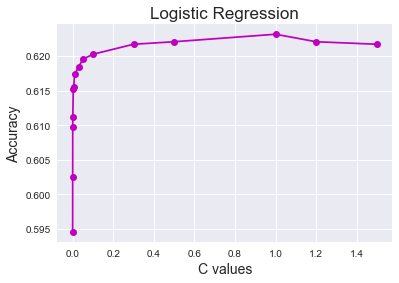

In [32]:
# import matplotlib.pyplot as plt

# plt.plot(C_values, accuracyL,'m-o')
# plt.title('Logistic Regression',fontsize=17)
# plt.xlabel('C values',fontsize=14)
# plt.ylabel('Accuracy',fontsize=14)
# plt.savefig('LogisticRegline.eps', format='eps', dpi=50)
# plt.show()
  

In [27]:
from sklearn import metrics, cross_validation

X1 = vectorizer.fit_transform(all_features_listTrain)
y1 = label_encoder.fit_transform(LabelsTrain)
predicted = cross_validation.cross_val_predict(lr1, X1, y1, cv=10)
metrics.accuracy_score(y1, predicted)

//anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.60759631036353767

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[416  86 310  76]
 [ 31 300  26  26]
 [251  95 609  56]
 [ 24  45  16 398]]


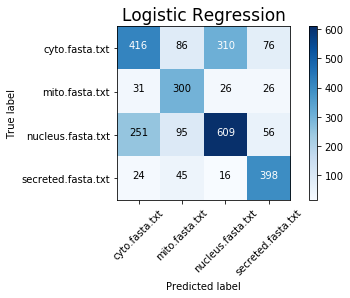

In [102]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


classes = label_encoder.inverse_transform([0,1,2,3])
class_names = classes
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation,event_y1_valid)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.title('Logistic Regression',fontsize= 17)
plt.savefig('LogisticReg.eps', format='eps', dpi=50)  
plt.show()

# SVM

In [143]:
from sklearn import svm

label_encoderV = LabelEncoder()

vectorizerV = DictVectorizer()

X= all_features_listTrain
y= LabelsTrain
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.30, random_state=48)

train_event_xV = vectorizerV.fit_transform(X_train)
train_event_yV = label_encoderV.fit_transform(y_train)

SV = svm.SVC(gamma=0.00001, C=100, probability= True)
SV= SV.fit(train_event_xV, train_event_yV)

In [144]:
event_xV_valid = vectorizerV.transform(X_validation)
event_yV_valid = label_encoderV.inverse_transform(SV.predict(event_xV_valid))
event_probV = SV.predict_proba(event_xV_valid)
#printResults(event_yX_valid,event_probX)

In [145]:
accuracy_score(y_validation,event_yV_valid)

0.65388788426763111

In [138]:
# accuracyV= []


# gammaa= [0.000001,0.00001,0.00003,0.0001,0.0003, 0.0005, 0.001, 0.003,0.005, 0.01,0.1]

# for i in gammaa:
    
#     SV = svm.SVC(gamma=i, C=100, probability= True)
#     SV= SV.fit(train_event_xV, train_event_yV)


#     event_xV_valid = vectorizerV.transform(X_validation)
#     event_yV_valid = label_encoderV.inverse_transform(SV.predict(event_xV_valid))
#     event_probV = SV.predict_proba(event_xV_valid)
#     #printResults(event_yL_valid,event_probL)

#     acc= accuracy_score(y_validation,event_yV_valid)
#     accuracyV.append(acc)


In [139]:
# accuracyV

[0.62712477396021704,
 0.65388788426763111,
 0.63291139240506333,
 0.61518987341772147,
 0.58842676311030739,
 0.58372513562386985,
 0.57504520795660041,
 0.52405063291139242,
 0.48354430379746838,
 0.43580470162748641,
 0.36564195298372515]

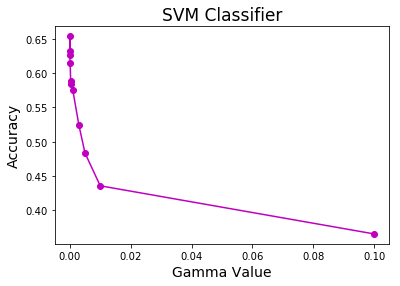

In [141]:
import matplotlib.pyplot as plt

plt.plot(gammaa, accuracyV,'m-o')
plt.title('SVM Classifier',fontsize=17)
plt.xlabel('Gamma Value',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.savefig('SVM.eps', format='eps', dpi=50)
plt.show()


Confusion matrix, without normalization
[[520  37 288  43]
 [ 71 265  26  21]
 [303  44 640  24]
 [ 47  28  25 383]]


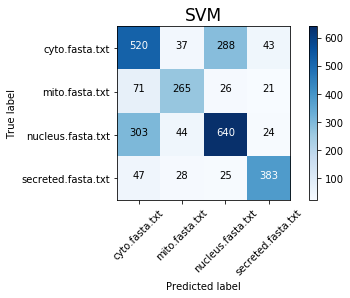

In [146]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation,event_yV_valid)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.title('SVM', fontsize=17)
plt.savefig('SVM_Confusion.eps', format='eps', dpi=50)
plt.show()
  

# XGBoost

In [96]:
import xgboost as xgb

label_encoderX = LabelEncoder()

vectorizerX = DictVectorizer()

X= all_features_listTrain
y= LabelsTrain
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.30, random_state=48)

train_event_xX = vectorizerX.fit_transform(X_train)
train_event_yX = label_encoderX.fit_transform(y_train)

XG = xgb.XGBClassifier(learning_rate =0.1,n_estimators=600,max_depth=5,min_child_weight=1,
 gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
XG= XG.fit(train_event_xX, train_event_yX)



In [36]:
event_xX_valid = vectorizerX.transform(X_validation)
event_yX_valid = label_encoderX.inverse_transform(XG.predict(event_xX_valid))
event_probX = XG.predict_proba(event_xX_valid)
# printResults(event_yX_valid,event_probX)

In [98]:
accuracy_score(y_validation,event_yX_valid)

0.66292947558770343

In [90]:
# accuracy= []


# estimatorsX= [200,400, 600, 1000, 1200, 1500, 1700, 2000]

# for i in estimatorsX:
    
#     XG = xgb.XGBClassifier(learning_rate =0.1 ,n_estimators= i,max_depth=5,min_child_weight=1,
#      gamma=0,subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
#     XG= XG.fit(train_event_xX, train_event_yX)

#     event_xX_valid = vectorizerX.transform(X_validation)
#     event_yX_valid = label_encoderX.inverse_transform(XG.predict(event_xX_valid))
#     event_probX = XG.predict_proba(event_xX_valid)
#     #printResults(event_yX_valid,event_probX)

#     acc= accuracy_score(y_validation,event_yX_valid)
#     accuracy.append(acc)



In [91]:
# accuracy

[0.66003616636528029,
 0.66112115732368892,
 0.66292947558770343,
 0.66184448462929479,
 0.65641952983725138,
 0.65678119349005426,
 0.65967450271247741,
 0.65858951175406877]

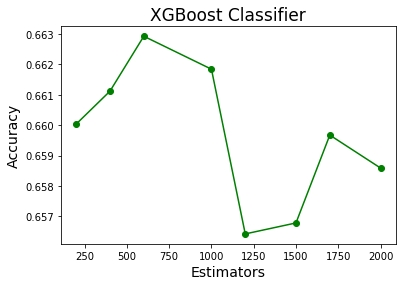

In [93]:

# import matplotlib.pyplot as plt

# plt.plot(estimatorsX, accuracy,'g-o')
# plt.title('XGBoost Classifier',fontsize=17)
# plt.xlabel('Estimators',fontsize=14)
# plt.ylabel('Accuracy',fontsize=14)
# plt.savefig('XGBoost.eps', format='eps', dpi=50)
# plt.show()


Confusion matrix, without normalization
[[543  32 285  28]
 [ 78 257  30  18]
 [285  42 664  20]
 [ 57  25  32 369]]


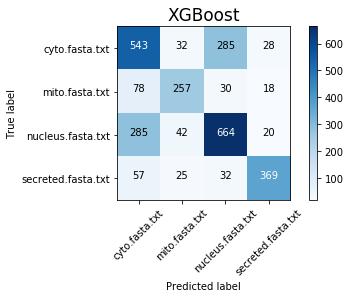

In [99]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation,event_yX_valid)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.title('XGBoost', fontsize=17)
plt.savefig('XGboost_Confusion.eps', format='eps', dpi=50)
plt.show()
  

# AdaBoostClassifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier

label_encoderL = LabelEncoder()

vectorizerL = DictVectorizer()

X= all_features_listTrain
y= LabelsTrain
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.30, random_state=48)

train_event_xL = vectorizerL.fit_transform(X_train)
train_event_yL = label_encoderL.fit_transform(y_train)

LS = AdaBoostClassifier(n_estimators=1000, learning_rate=0.15)
LS= LS.fit(train_event_xL, train_event_yL)



In [37]:
event_xL_valid = vectorizerL.transform(X_validation)
event_yL_valid = label_encoderL.inverse_transform(LS.predict(event_xL_valid))
event_probL = LS.predict_proba(event_xL_valid)
# printResults(event_yL_valid,event_probL)

In [12]:
accuracy_score(y_validation,event_yL_valid)

0.60397830018083187

In [13]:
# accuracy= []


# learning= [0.0001,0.0003, 0.0005, 0.001, 0.003,0.005, 0.01,0.1, 0.12, 0.15, 0.3, 0.5, 0.9]

# for i in learning:
    
#     LS = AdaBoostClassifier(n_estimators=1000, learning_rate= i)
#     LS= LS.fit(train_event_xL, train_event_yL)


#     event_xL_valid = vectorizerL.transform(X_validation)
#     event_yL_valid = label_encoderL.inverse_transform(LS.predict(event_xL_valid))
#     event_probL = LS.predict_proba(event_xL_valid)
#     #printResults(event_yL_valid,event_probL)

#     acc= accuracy_score(y_validation,event_yL_valid)
#     accuracy.append(acc)



In [101]:
# accuracy

[0.44412296564195297,
 0.44484629294755879,
 0.44448462929475585,
 0.44303797468354428,
 0.4820976491862568,
 0.51066907775768533,
 0.54936708860759498,
 0.59349005424954793,
 0.59710669077757683,
 0.60397830018083187,
 0.60144665461121161,
 0.60144665461121161,
 0.58300180831826398]

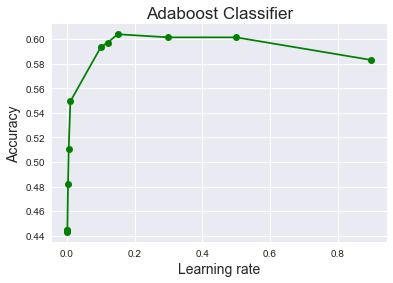

In [14]:

# import matplotlib.pyplot as plt

# plt.plot(learning, accuracy,'g-o')
# plt.title('Adaboost Classifier',fontsize=17)
# plt.xlabel('Learning rate',fontsize=14)
# plt.ylabel('Accuracy',fontsize=14)
# plt.savefig('Adaboostline.eps', format='eps', dpi=50)
# plt.show()


In [26]:
# optimal_learning =learning[np.argmax(accuracy)]
# optimal_learning

Confusion matrix, without normalization
[[354  50 437  47]
 [ 67 251  35  30]
 [217  64 701  29]
 [ 68  34  24 357]]


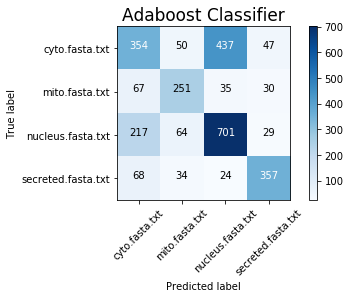

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation,event_yL_valid)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.title('Adaboost Classifier', fontsize=17)
plt.savefig('Adaboost.eps', format='eps', dpi=50)
plt.show()


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

label_encoderR = LabelEncoder()

vectorizerR = DictVectorizer()

X= all_features_listTrain
y= LabelsTrain
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.30, random_state=48)

train_event_xR = vectorizerR.fit_transform(X_train)
train_event_yR = label_encoderR.fit_transform(y_train)
rf = RandomForestClassifier(n_estimators=2000, oob_score=True, n_jobs=-1)
rf = rf.fit(train_event_xR, train_event_yR)



In [38]:
event_xR_valid = vectorizerR.transform(X_validation)
event_yR_valid = label_encoderR.inverse_transform(rf.predict(event_xR_valid))
event_probR = rf.predict_proba(event_xR_valid)
# printResults(event_yR_valid,event_probR)

In [53]:
accuracy_score(y_validation,event_yR_valid)

0.64231464737793853

In [16]:
# accuracyR= []



# estimators= [200,400, 600, 1000, 1200, 1500, 1700, 2000]

# for i in estimators:
    
#     rf = RandomForestClassifier(n_estimators= i, oob_score=True, n_jobs=-1)
#     rf = rf.fit(train_event_xR, train_event_yR)



#     event_xR_valid = vectorizerR.transform(X_validation)
#     event_yR_valid = label_encoderR.inverse_transform(rf.predict(event_xR_valid))
#     event_probR = rf.predict_proba(event_xR_valid)
#     #printResults(event_yR_valid,event_probR)

#     acc= accuracy_score(y_validation,event_yR_valid)
#     accuracyR.append(acc)

In [24]:
# accuracyR

In [25]:

# import matplotlib.pyplot as plt

# plt.plot(estimators, accuracyR,'r-s')
# plt.title('Random Forest',fontsize=17)
# plt.xlabel('Estimators',fontsize=14)
# plt.ylabel('Accuracy',fontsize=14)
# plt.savefig('RandomForestline.eps', format='eps', dpi=50)
# plt.show()

In [34]:
# optimal_estimator =estimators[np.argmax(accuracyR)]
# optimal_estimator

In [39]:
#evaluating the model on test set.
event_xtestR = vectorizer.transform(all_features_listTest)
event_ytestR = label_encoder.inverse_transform(lr1.predict(event_xtestR))
event_prob_testR = lr1.predict_proba(event_xtestR)
# printResults(event_ytestR, event_prob_testR)

Confusion matrix, without normalization
[[533  31 295  29]
 [ 72 239  51  21]
 [278  31 681  21]
 [ 82  26  52 323]]


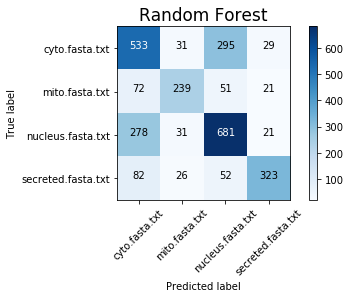

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation,event_yR_valid)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.title('Random Forest', fontsize=17)
plt.savefig('Random.eps', format='eps', dpi=50) 
plt.show()
 

# Neural Network

In [18]:
from sklearn.neural_network import MLPClassifier

label_encoderM = LabelEncoder()

vectorizerM = DictVectorizer()

X= all_features_listTrain
y= LabelsTrain
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.30, random_state=48)

train_event_xM = vectorizerM.fit_transform(X_train)
train_event_yM = label_encoderM.fit_transform(y_train)
ML = MLPClassifier(learning_rate='adaptive', max_iter=1000, learning_rate_init=0.001, random_state= 1)
ML = ML.fit(train_event_xM, train_event_yM)

In [40]:
event_xM_valid = vectorizerM.transform(X_validation)
event_yM_valid = label_encoderM.inverse_transform(ML.predict(event_xM_valid))
event_probM = ML.predict_proba(event_xM_valid)
# printResults(event_yM_valid,event_probM)

In [58]:
accuracy_score(y_validation,event_yM_valid)

0.63327305605786621

In [19]:
# accuracyM= []



# learningM= [0.0001,0.0003, 0.0005, 0.001, 0.003,0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5]

# for i in learningM:
    
#     ML = MLPClassifier(learning_rate='adaptive', max_iter=1000, learning_rate_init=i,random_state= 1)
#     ML = ML.fit(train_event_xM, train_event_yM)


#     event_xM_valid = vectorizerM.transform(X_validation)
#     event_yM_valid = label_encoderM.inverse_transform(ML.predict(event_xM_valid))
#     event_probM = ML.predict_proba(event_xM_valid)
#     #printResults(event_yM_valid,event_probM)

#     acc= accuracy_score(y_validation,event_yM_valid)
#     accuracyM.append(acc)

In [41]:
# accuracyM

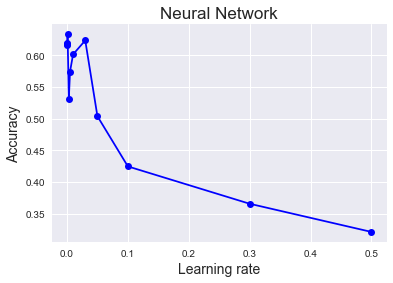

In [20]:
# import matplotlib.pyplot as plt

# plt.plot(learningM, accuracyM,'b-o')
# plt.title('Neural Network',fontsize=17)
# plt.xlabel('Learning rate',fontsize=14)
# plt.ylabel('Accuracy',fontsize=14)
# #plt.savefig('NeuralNetworkline.eps', format='eps', dpi=50)
# plt.show()

In [43]:
# optimal_learningN =learningM[np.argmax(accuracyM)]
# optimal_learningN

In [59]:
#evaluating the model on test set.
event_xtestM = vectorizer.transform(all_features_listTest)
event_ytestM = label_encoder.inverse_transform(ML.predict(event_xtestM))
event_prob_testM = ML.predict_proba(event_xtestM)
printResults(event_ytestM, event_prob_testM)

Class			Confidence
cyto			0.4309006003338878
secreted			0.607340298237095
secreted			0.4939629698743309
nucleus			0.651934954022032
cyto			0.4976286231088661
cyto			0.5408371448314443
nucleus			0.4562193263094223
cyto			0.6793619247481074
mito			0.5175352132386726
cyto			0.6849232653674218
mito			0.6682716147795802
nucleus			0.4574111721722373
secreted			0.8740036737574711
cyto			0.8299397180278264
nucleus			0.7107944666364496
nucleus			0.819371091233814
nucleus			0.6069416323935083
nucleus			0.6198879935331899
cyto			0.8859197050579961
cyto			0.6615642728459386


Confusion matrix, without normalization
[[435  60 367  26]
 [ 63 273  29  18]
 [247  57 681  26]
 [ 50  49  22 362]]


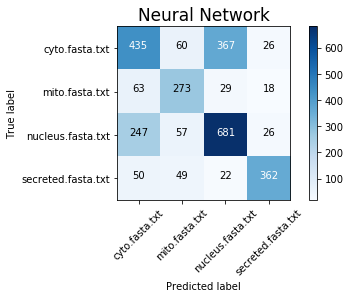

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation,event_yM_valid)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.title('Neural Network', fontsize=17)
plt.savefig('Neural.eps', format='eps', dpi=50)
plt.show()
  

# Voting Classifier

In [128]:
from sklearn.ensemble import VotingClassifier

label_encoderV = LabelEncoder()

vectorizerV = DictVectorizer()

X= all_features_listTrain
y= LabelsTrain
X_train, X_validation, y_train, y_validation = train_test_split( X, y, test_size=0.30, random_state=48)

train_event_xV = vectorizerR.fit_transform(X_train)
train_event_yV = label_encoderR.fit_transform(y_train)


eclf1 = VotingClassifier(estimators=[('lr', lr1), ('rf', rf), ('XGBoost',XG),('SVM',SV), ('neural', ML)], voting='soft')
eclf1 = eclf1.fit(train_event_xV, train_event_yV)

In [41]:
event_xV_valid = vectorizerM.transform(X_validation)
event_yV_valid = label_encoderM.inverse_transform(eclf1.predict(event_xV_valid))
event_probV = eclf1.predict_proba(event_xV_valid)
# printResults(event_yV_valid,event_probV)



In [21]:
accuracy_score(y_validation,event_yV_valid)

In [64]:
#evaluating the model on test set.
event_xtestV = vectorizer.transform(all_features_listTest)
event_ytestV = label_encoder.inverse_transform(eclf1.predict(event_xtestV))
event_prob_testV = eclf1.predict_proba(event_xtestV)
printResults(event_ytestV, event_prob_testV)

Class			Confidence
cyto			0.3046156711431783
secreted			0.5637242648943621
secreted			0.5159939220537422
cyto			0.4621457937745367
nucleus			0.4682666084561558
nucleus			0.5088333106110421
cyto			0.3891790473402197
cyto			0.5878854394966979
cyto			0.44470169835631446
cyto			0.39875659688064224
mito			0.6283919080845081
mito			0.5018086741041458
secreted			0.644979839035471
cyto			0.6290943962753798
nucleus			0.6630331640413261
nucleus			0.6428272243942532
nucleus			0.47614801028753106
nucleus			0.5112888773077306
mito			0.42192235834119096
cyto			0.4450137785716491


Confusion matrix, without normalization
[[505  42 309  32]
 [ 66 272  27  18]
 [263  46 682  20]
 [ 52  33  18 380]]


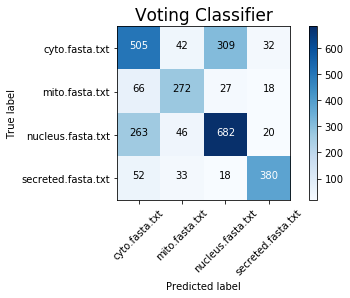

In [65]:
# Compute confusion matrix FOR THE VALIDATION SET
cnf_matrix = confusion_matrix(y_validation,event_yV_valid)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
plt.title('Voting Classifier', fontsize=17)
plt.savefig('Voting Classifier.eps', format='eps', dpi=50)
plt.show()
  